# Анализ моих игр на Lichess

In [3]:
import requests
import chess.pgn
from collections import Counter
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [4]:
username = 'AndrewSalmin'

In [5]:
def download_pgn_games(username):
    url = f'https://lichess.org/api/games/user/{username}'
    
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.text
    else:
        return None

with open('games.pgn', 'w') as f:
    f.write(download_pgn_games(username))

In [6]:
games = []
with open('games.pgn') as f:
    while True:
        game = chess.pgn.read_game(f)
        if game is None:
            break
        games.append(game)

print(f'Прочитано партий: {len(games)}')

Прочитано партий: 1230


## Анализ хедеров

### Топ-10 событий по числу партий

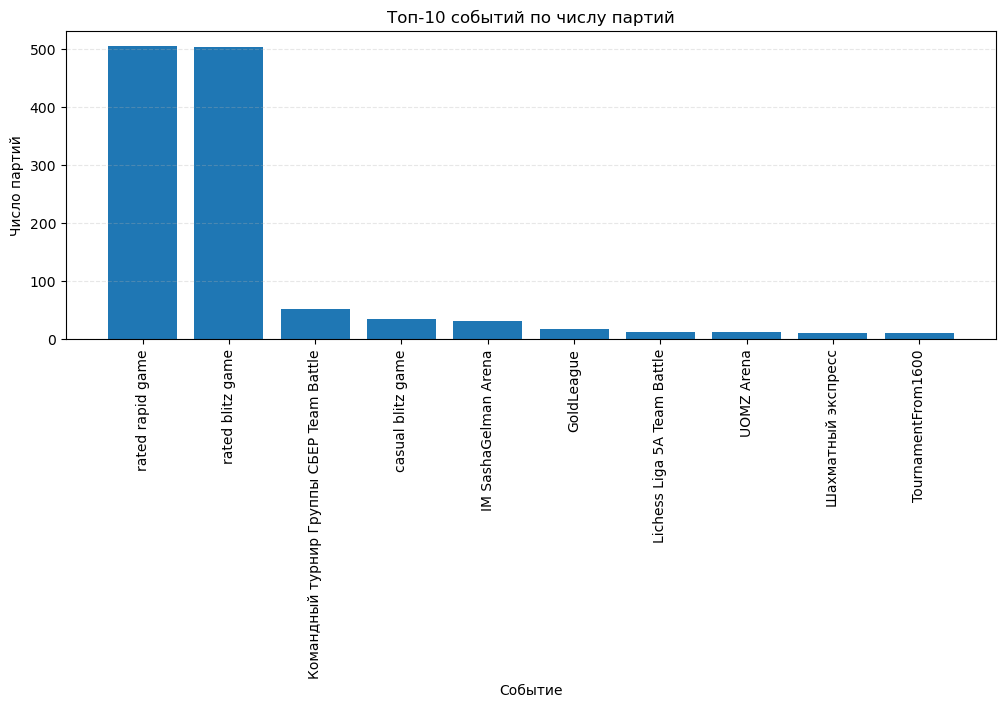

In [9]:
events = list()
for game in games:
    events.append(game.headers['Event'])

top_10_events_counter = dict(Counter(events).most_common(10))

plt.figure(figsize=(12, 4))
plt.bar(top_10_events_counter.keys(), top_10_events_counter.values())
plt.title('Топ-10 событий по числу партий')
plt.xlabel('Событие')
plt.ylabel('Число партий')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3, linestyle='--')

### Топ-10 соперников по числу партий

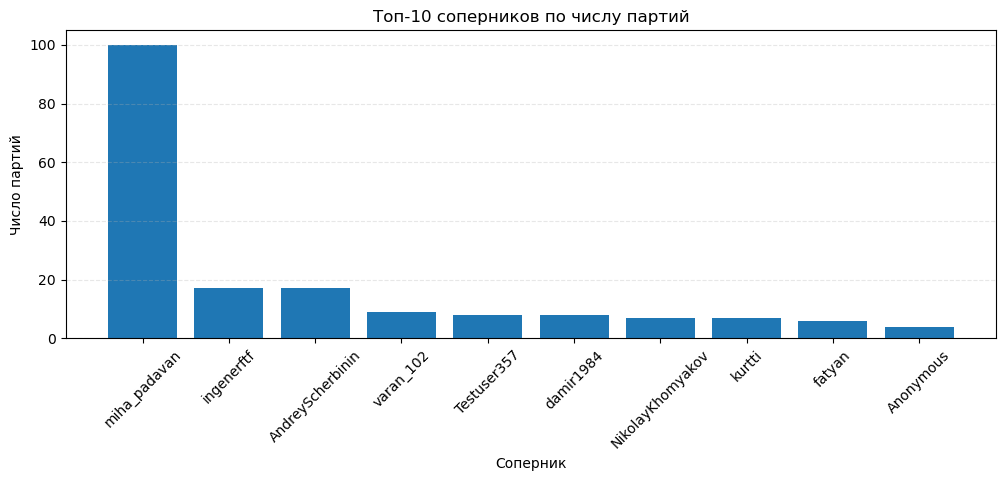

In [11]:
opponents = list()
for game in games:
    white = game.headers['White']
    if white != username:
        opponents.append(white)
    else:
        opponents.append(game.headers['Black'])

top_10_opponents_counter = dict(Counter(opponents).most_common(10))

plt.figure(figsize=(12, 4))
plt.bar(top_10_opponents_counter.keys(), top_10_opponents_counter.values())
plt.title('Топ-10 соперников по числу партий')
plt.xlabel('Соперник')
plt.ylabel('Число партий')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3, linestyle='--')

### Распределение игр по датам и времени

In [13]:
utc_date_time = list()
for game in games:
    utc_date_time.append(datetime.strptime(game.headers['UTCDate'] + ' ' + game.headers['UTCTime'], '%Y.%m.%d %H:%M:%S'))

ekb_date_time = list()
for date_time in utc_date_time:
    ekb_date_time.append(date_time + timedelta(hours=5))

years = list()
months = list()
days = list()
weekdays = list()
hours = list()
for date_time in ekb_date_time:
    years.append(date_time.year)
    months.append(date_time.month)
    days.append(date_time.day)
    weekdays.append(date_time.weekday())
    hours.append(date_time.hour)

#### Распределение партий по годам

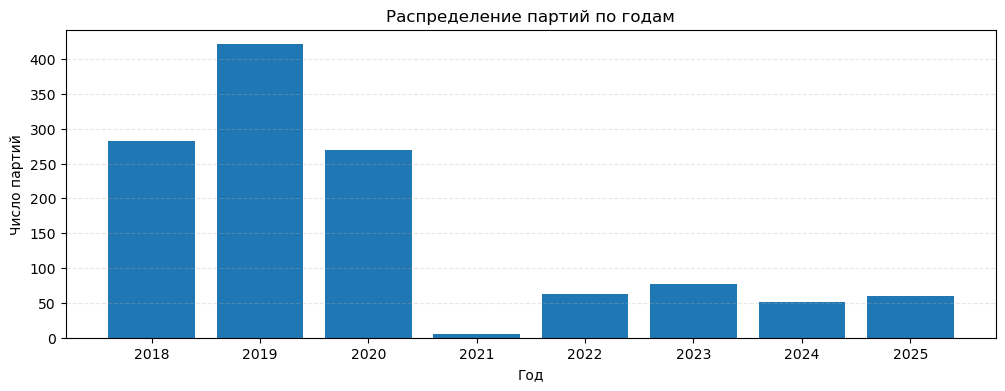

In [15]:
years_counter = Counter(years)

plt.figure(figsize=(12, 4))
plt.bar(years_counter.keys(), years_counter.values())
plt.title('Распределение партий по годам')
plt.xlabel('Год')
plt.ylabel('Число партий')
plt.xticks(range(min(years), max(years) + 1))
plt.grid(axis='y', alpha=0.3, linestyle='--')

#### Распределение партий по месяцам

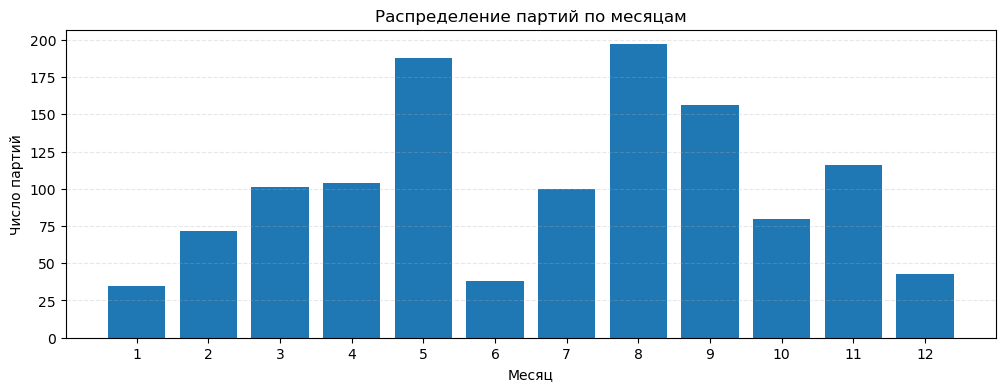

In [17]:
months_counter = Counter(months)

plt.figure(figsize=(12, 4))
plt.bar(months_counter.keys(), months_counter.values())
plt.title('Распределение партий по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Число партий')
plt.xticks(range(1, 13))
plt.grid(axis='y', alpha=0.3, linestyle='--')

#### Распределение партий по числам месяца

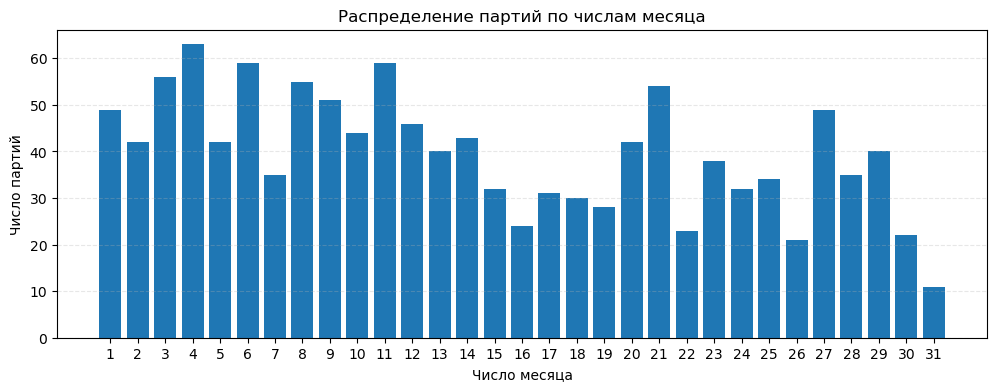

In [19]:
days_counter = Counter(days)

plt.figure(figsize=(12, 4))
plt.bar(days_counter.keys(), days_counter.values())
plt.title('Распределение партий по числам месяца')
plt.xlabel('Число месяца')
plt.ylabel('Число партий')
plt.xticks(range(1, 32))
plt.grid(axis='y', alpha=0.3, linestyle='--')

#### Распределение партий по времени суток

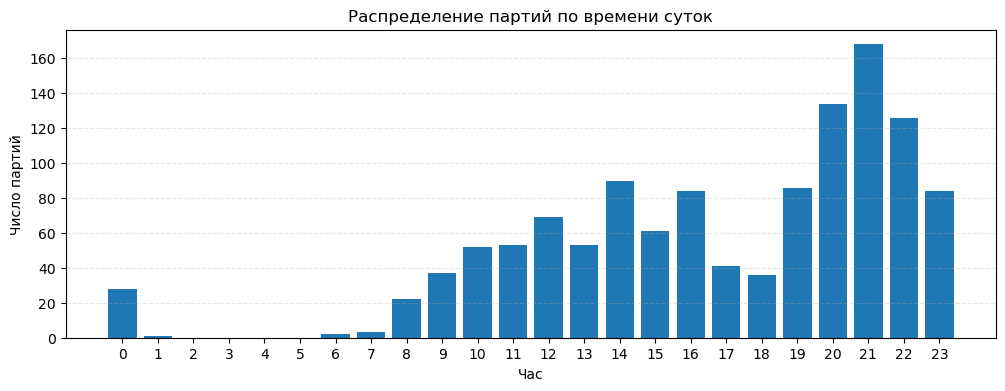

In [21]:
hours_counter = Counter(hours)

plt.figure(figsize=(12, 4))
plt.bar(hours_counter.keys(), hours_counter.values())
plt.title('Распределение партий по времени суток')
plt.xlabel('Час')
plt.ylabel('Число партий')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3, linestyle='--')

#### Распределение партий по дням недели

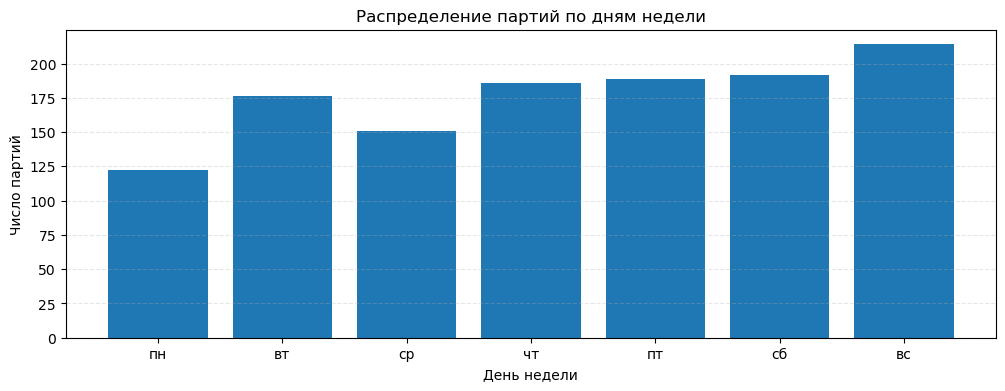

In [23]:
weekdays_counter = Counter(weekdays)

plt.figure(figsize=(12, 4))
plt.bar(weekdays_counter.keys(), weekdays_counter.values())
plt.title('Распределение партий по дням недели')
plt.xlabel('День недели')
plt.ylabel('Число партий')
plt.xticks(range(7), ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])
plt.grid(axis='y', alpha=0.3, linestyle='--')

### Распределение партий по контролям

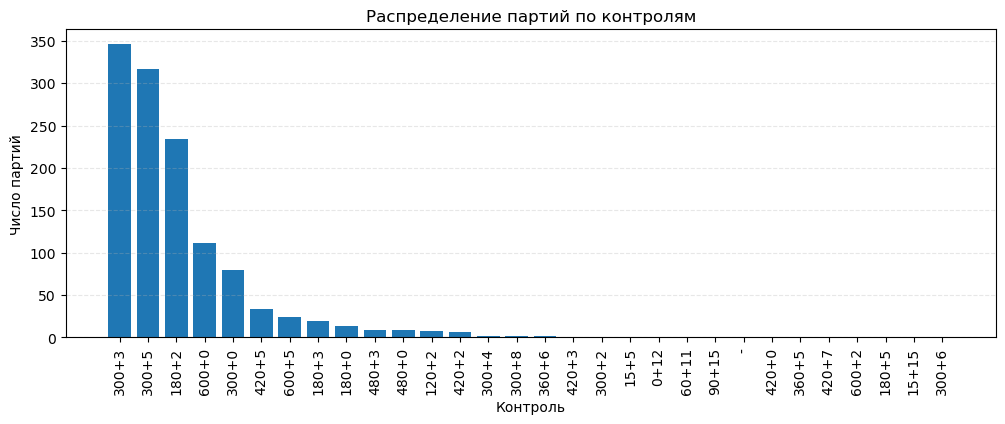

In [25]:
time_controls = list()
for game in games:
    time_controls.append(game.headers['TimeControl'])
time_controls_counter = dict(Counter(time_controls).most_common())

plt.figure(figsize=(12, 4))
plt.bar(time_controls_counter.keys(), time_controls_counter.values())
plt.title('Распределение партий по контролям')
plt.xlabel('Контроль')
plt.ylabel('Число партий')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3, linestyle='--')

### Распределение партий по типам завершений

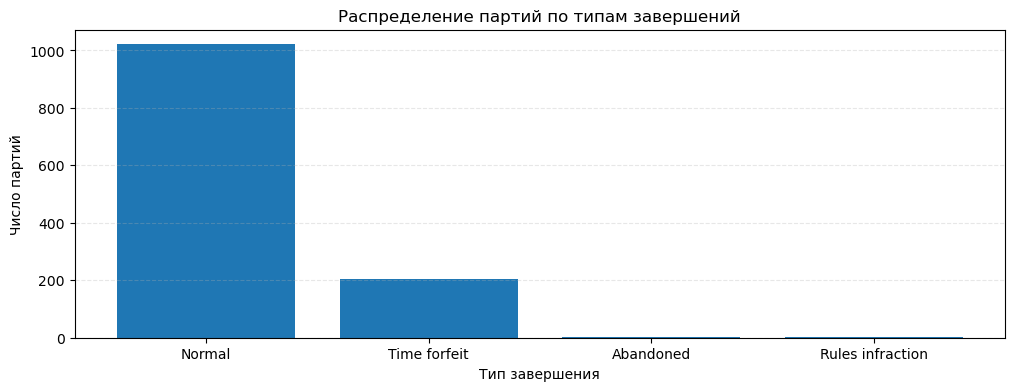

In [27]:
terminations = list()
for game in games:
    terminations.append(game.headers['Termination'])

terminations_counter = dict(Counter(terminations).most_common())

plt.figure(figsize=(12, 4))
plt.bar(terminations_counter.keys(), terminations_counter.values())
plt.title('Распределение партий по типам завершений')
plt.xlabel('Тип завершения')
plt.ylabel('Число партий')
plt.grid(axis='y', alpha=0.3, linestyle='--')